In [1]:
import numpy as np
import matplotlib.pyplot as plt

/tmp/ipykernel_73441/4172818783.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


          x1        x2  y
0   4.672338  4.768932  0
1   4.399361  8.119413  1
2   5.931280  5.437637  0
3   4.398293  7.458540  1
4   4.780328  4.095963  0
5   5.314247  8.252502  1
6   6.031000  5.104471  0
7   5.087047  4.555732  0
8   4.536582  7.408099  1
9   5.542560  8.850014  1
10  5.647689  8.816296  1
11  5.328751  4.759257  0
12  4.539361  7.682773  1
13  5.005113  4.480296  0
14  4.191506  4.023440  0
15  6.477894  5.962883  0
16  3.849006  7.298090  1
17  4.354880  4.349911  0
18  4.498243  3.863170  0
19  4.323078  4.298164  0


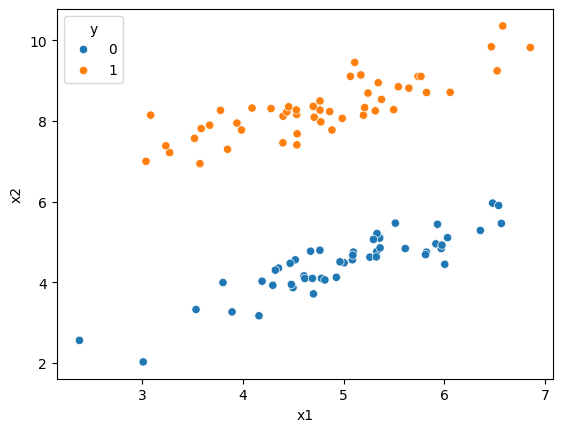

In [2]:
import pandas as pd
import seaborn as sns

np.random.seed(42)

def sep_line(x):
    return 0.7*x + 3

x1 = np.random.normal(loc= 5, scale= 1, size= 100)
x2 = [sep_line(x1[i]) + np.random.normal(loc= 2, scale= 0.4, size= 1)[0] for i in range(50)]
x3 = [sep_line(x1[i]) - np.random.normal(loc= 2, scale= 0.4, size= 1)[0] for i in range(50, 100)]
x2 = x2+x3
y = [1 for i in range(50)] + [0 for i in range(50)]

data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
data = data.sample(frac=1).reset_index(drop=True)

sns.scatterplot(x='x1', y='x2', hue='y', data=data)
print(data.head(20))




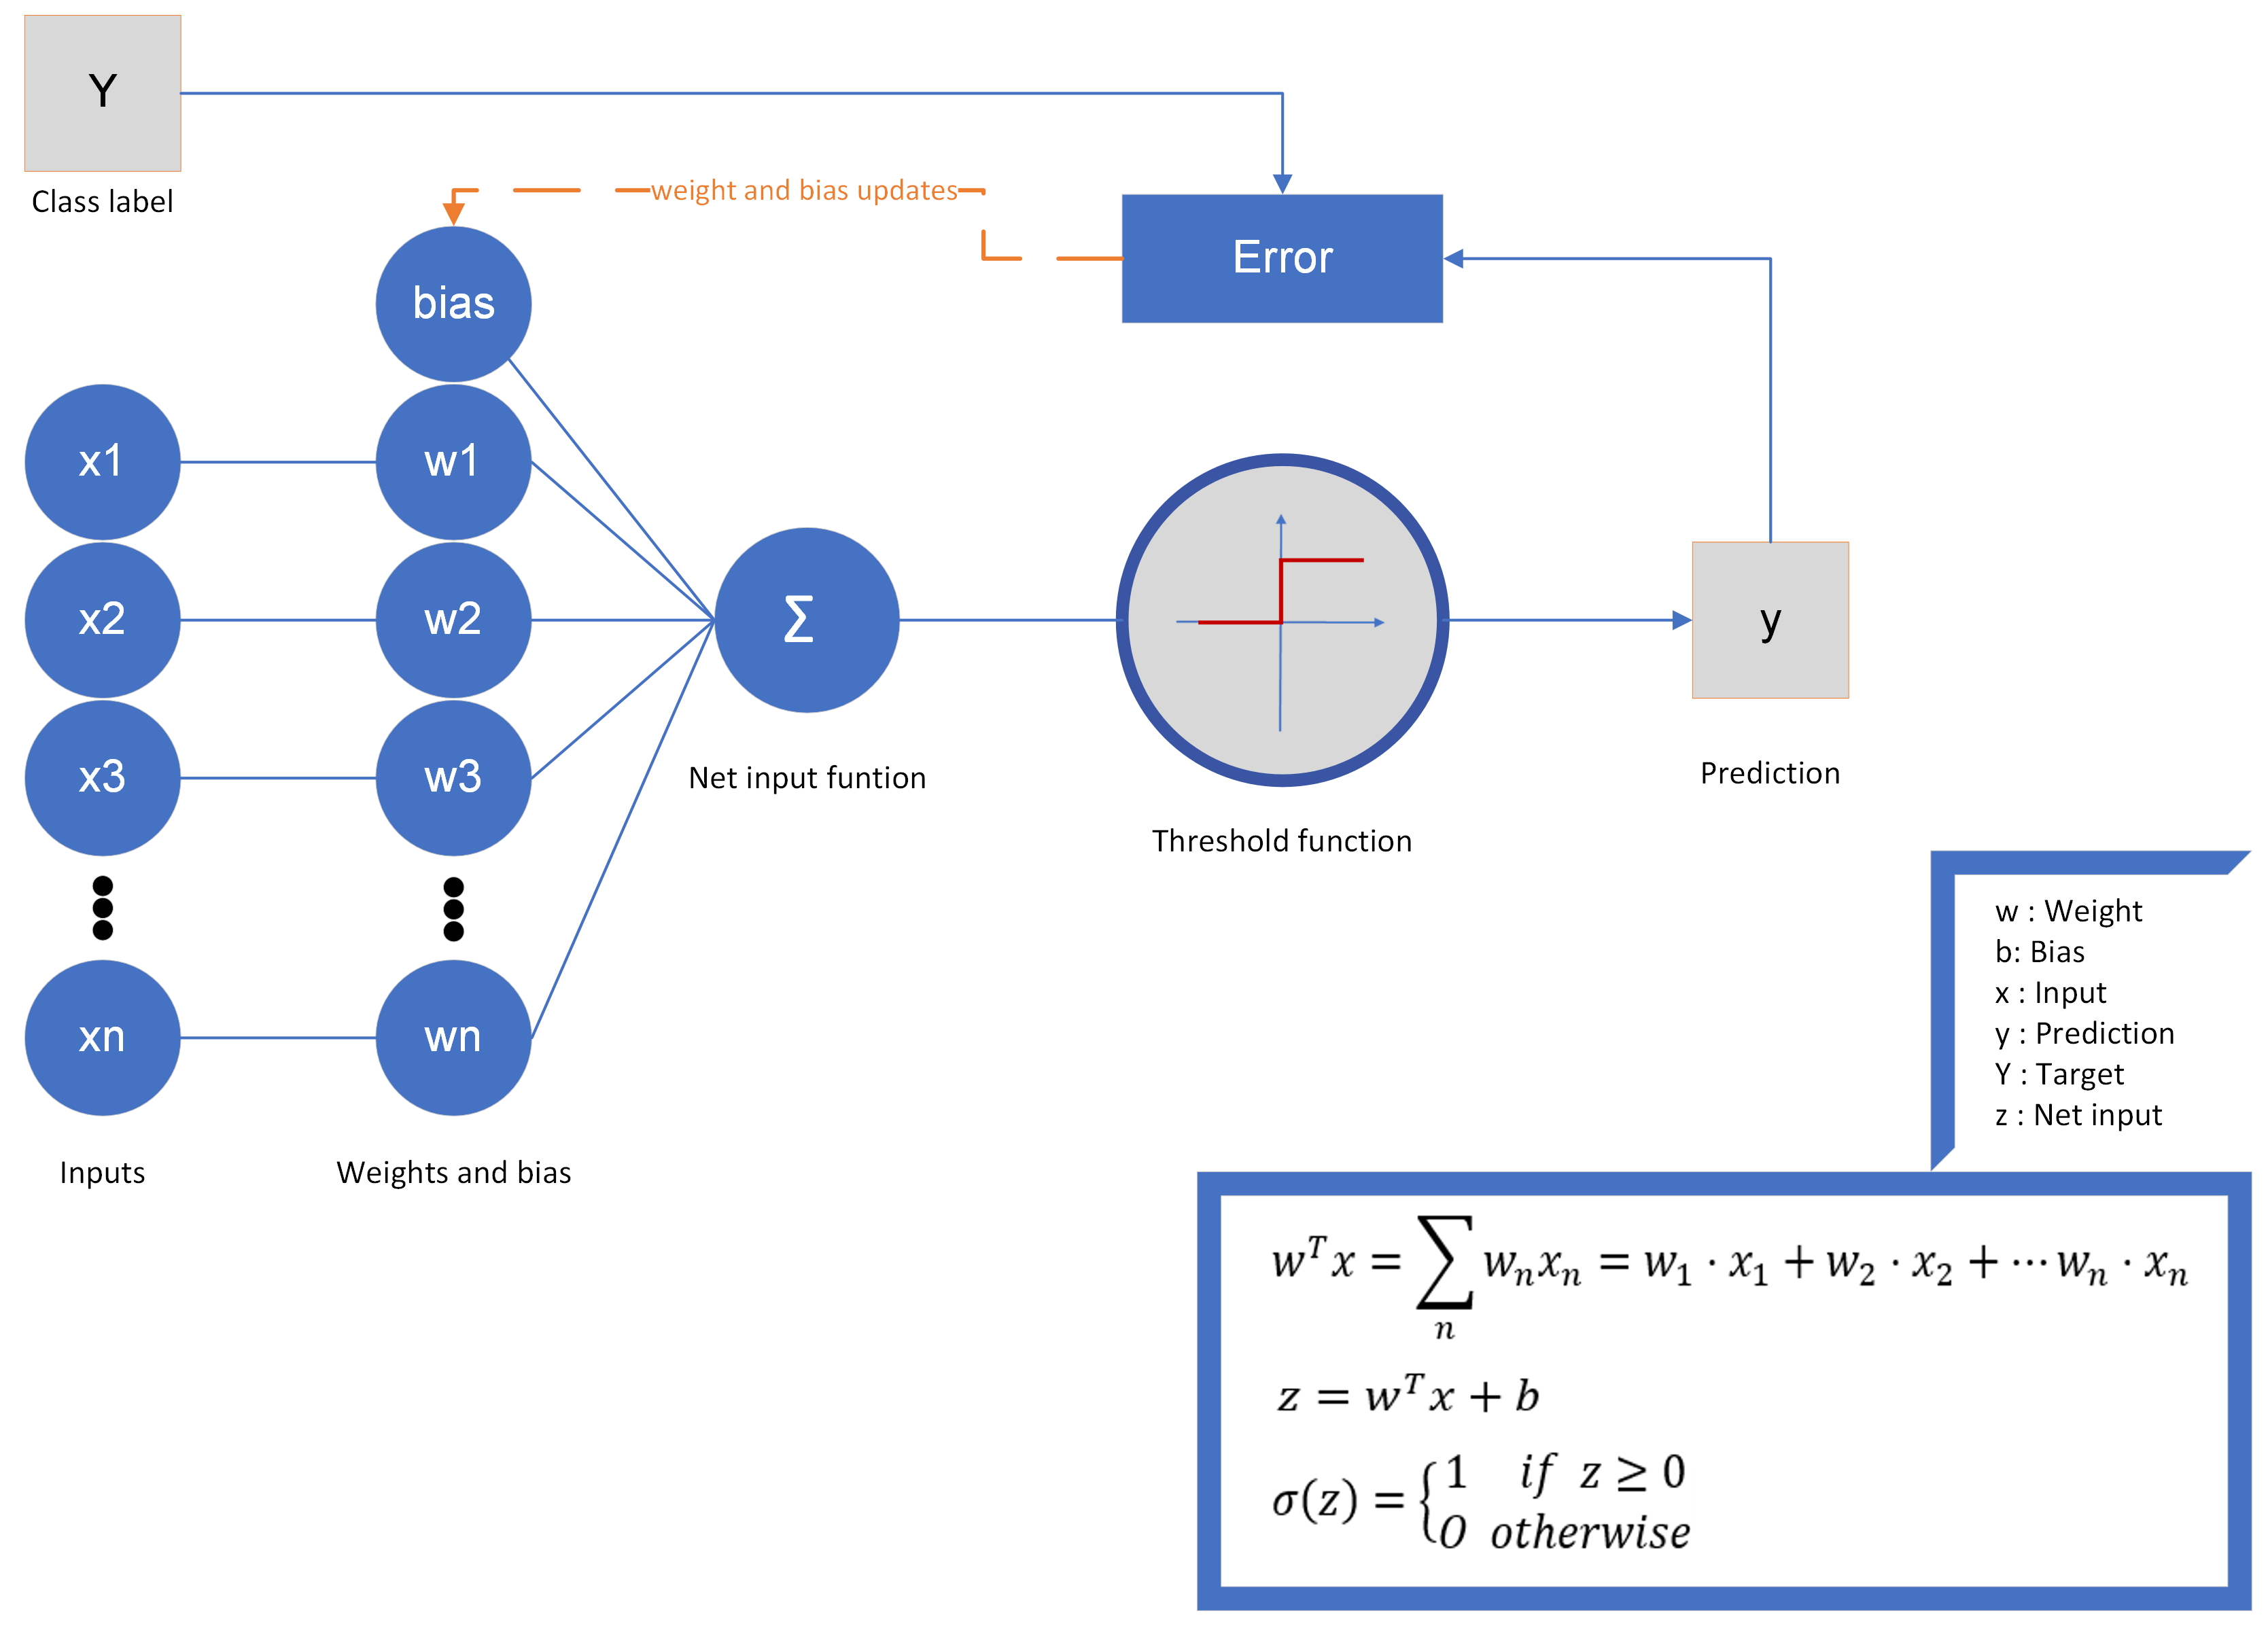

In [3]:
from IPython.display import Image
Image("images/perceptron-diagram.png", width=800, height=700)

In [4]:
class Perceptron:

    def __init__(self, lr=0.01, n_iter=500, random_state=42):
        self.lr = lr #learning rate
        self.n_iter = n_iter #number of epochs
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.weigth_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.bias_ = float(0.0)
        self.update = []
        self.errors_ = []
        for _ in range(self.n_iter):
            errors = 0
            for x, target in zip(X,y):
                update = self.lr * (target - self.predict(x))
                self.weigth_ += update * x
                self.bias_ += update
                errors += int(update != 0.0)
                #print(update, target - self.predict(x))
            self.update.append(update)
            self.errors_.append(errors)
        return self
    
    #net input function
    def net_input(self, X):
        return np.dot(X, self.weigth_) + self.bias_ 
    
    #predict function with threshold function
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

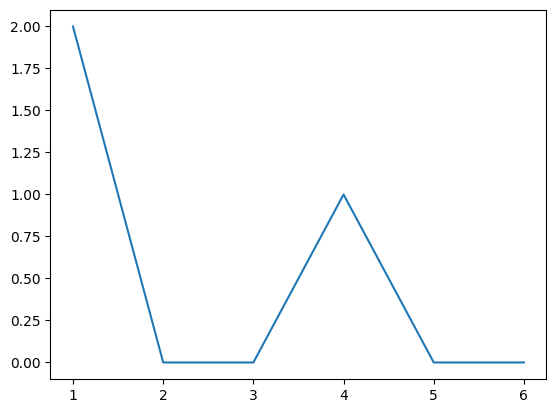

In [5]:
from sklearn.preprocessing import StandardScaler
y = data['y'].values
X = data[['x1', 'x2']].values
scaler = StandardScaler()
X = scaler.fit_transform(X)

percep = Perceptron(lr=0.01, n_iter=6)
percep.fit(X, y)

percep.errors_ = [error - 50 for error in percep.errors_]
plt.plot(range(1, len(percep.errors_)+1), percep.errors_)



In [6]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, resolution=0.02, ax=None):
    markers = ('o', 's')
    colors = ('red', 'blue')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    lab = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    lab = lab.reshape(xx1.shape)
    if ax is None:
        plt.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
        plt.xlim(xx1.min(), xx1.max())
        plt.ylim(xx2.min(), xx2.max())
    else:
        ax.contourf(xx1, xx2, lab, alpha=0.2, cmap=cmap)
        ax.set_xlim(xx1.min(), xx1.max())
        ax.set_ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        if ax is None:
            plt.scatter(x=X[y == cl, 0], 
                        y=X[y == cl, 1],
                        c=colors[idx],
                        marker=markers[idx], 
                        edgecolor='black')
        else:
            ax.scatter(x=X[y == cl, 0], 
                       y=X[y == cl, 1], 
                       c=colors[idx],
                       marker=markers[idx], 
                       edgecolor='black')

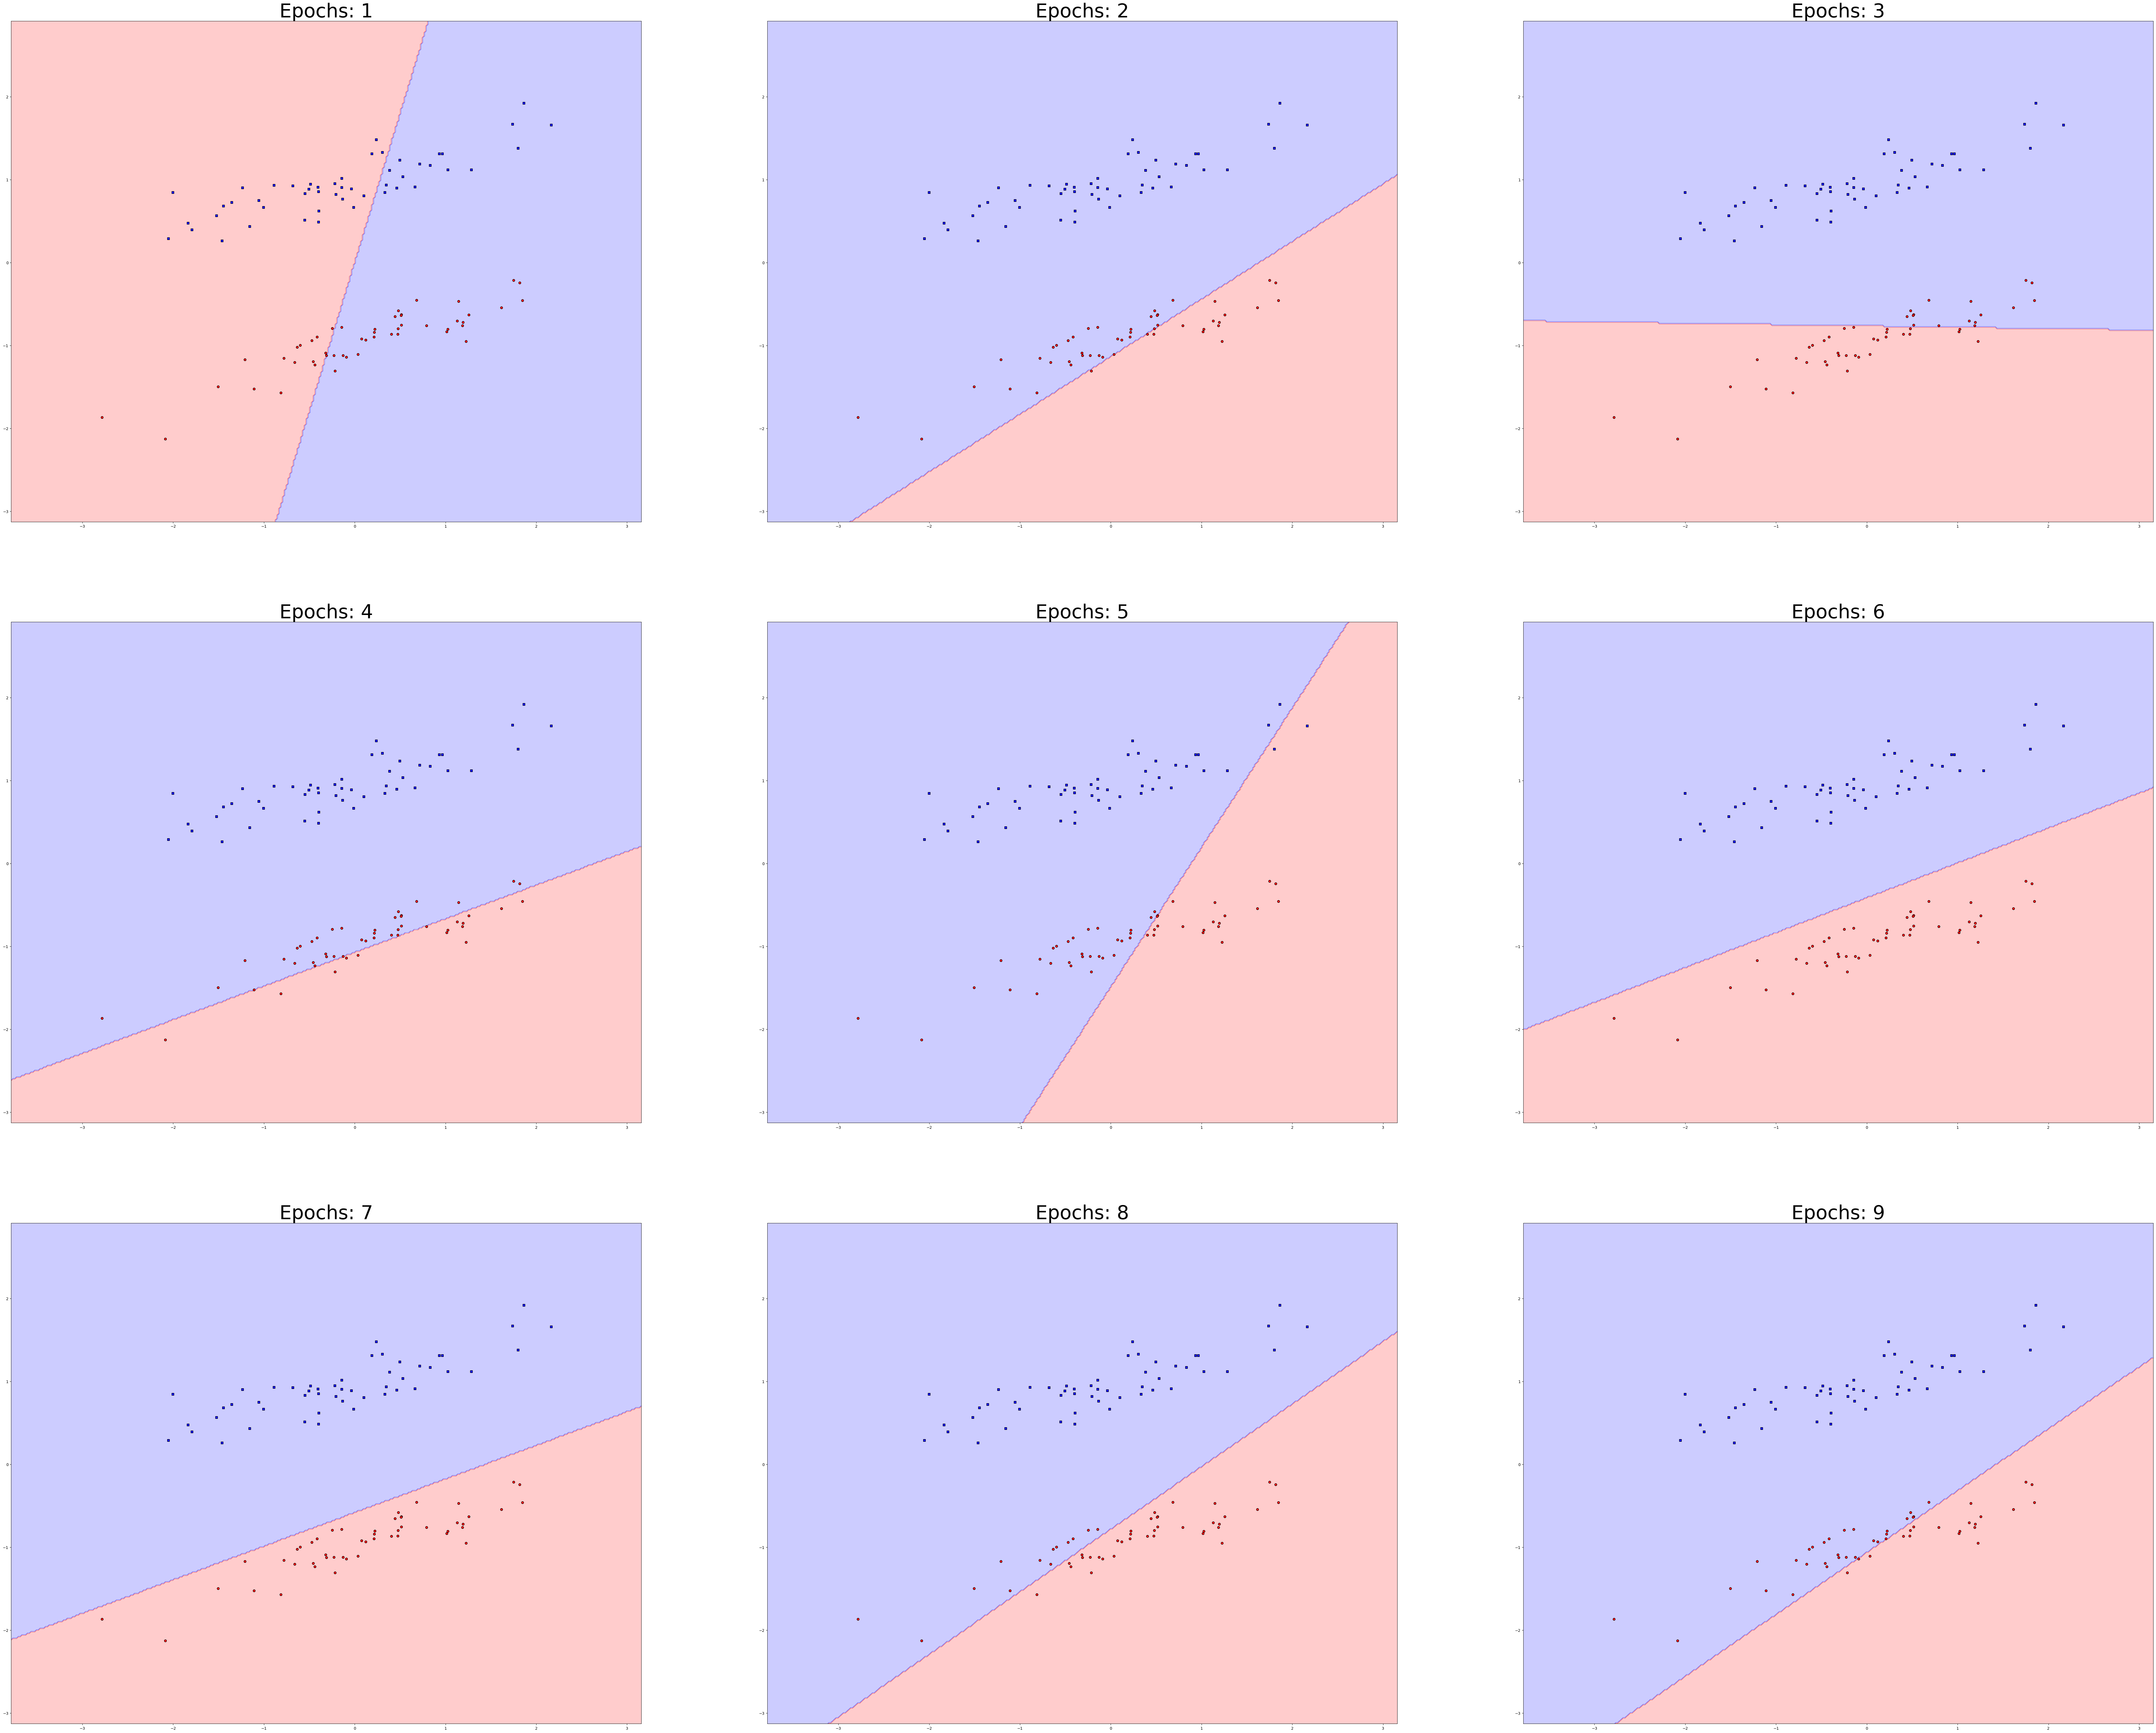

In [7]:
n = 9
n1 = int(n/3)
epochs = range(0,n)
z = 0
fig, ax = plt.subplots(n1, 3, figsize=(100, 80))
for i in epochs:
    percep = Perceptron(lr=0.001, n_iter=i)
    percep.fit(X, y)
    row = int(z/3)
    col = int(z%3)
    z += 1

    plot_decision_regions(X, y, classifier=percep, ax=ax[row, col]) 

    ax[row, col].set_title('Epochs: {}'.format(i+1), fontsize=50)
plt.show()

We can clearly see that after the 6th epoch, by the nature of the perceptron, it continues to adjust weights and starts to mispredict.